# T-SNE & UMAP
T-SNE (https://lvdmaaten.github.io/tsne/) and UMAP (https://github.com/lmcinnes/umap) are two technicalities, often used by data scientists, that allow to project multivariate data into lower dimensions. They are often used to find clusters in data. I used the fast t-SNE and UMAP implementations offered by Rapids (they require GPU access). 

In [1]:
%%time
import sys
!cp -f ../input/rapids/rapids.21.06 /opt/conda/envs/rapids.tar.gz
!cd -f /opt/conda/envs/ && tar -xzvf rapids.tar.gz
sys.path = ["/opt/conda/envs/rapids/lib"] + ["/opt/conda/envs/rapids/lib/python3.7"] + ["/opt/conda/envs/rapids/lib/python3.7/site-packages"] + sys.path
!cp -f /opt/conda/envs/rapids/lib/libxgboost.so /opt/conda/lib/

cp: cannot stat '../input/rapids/rapids.21.06': No such file or directory
/bin/bash: line 0: cd: -f: invalid option
cd: usage: cd [-L|[-P [-e]] [-@]] [dir]
cp: cannot stat '/opt/conda/envs/rapids/lib/libxgboost.so': No such file or directory
CPU times: user 10.1 ms, sys: 11.8 ms, total: 21.8 ms
Wall time: 2.02 s


In [2]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import os
import pprint
import joblib
from functools import partial

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

# Regressors
import lightgbm as lgb

# Model selection
from sklearn.model_selection import KFold, StratifiedKFold

# Metrics
from sklearn.metrics import mean_squared_error

# Data processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# 
import cudf, cuml
import cupy as cp
from cuml.manifold import TSNE, UMAP
import matplotlib.pyplot as plt
from matplotlib.pyplot import ylim, xlim
%matplotlib inline

In [3]:
# Loading data 
X = pd.read_csv("../input/tabular-playground-series-nov-2021/train.csv")
X_test = pd.read_csv("../input/tabular-playground-series-nov-2021/test.csv")

In [4]:
# Preparing data as a tabular matrix
y = X.target
X = X.set_index('id').drop('target', axis='columns')
X_test = X_test.set_index('id')

In [5]:
tsne = TSNE(n_components=2, perplexity=50, n_neighbors=50)
projection_2D = tsne.fit_transform(X)

[W] [11:26:06.323315] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


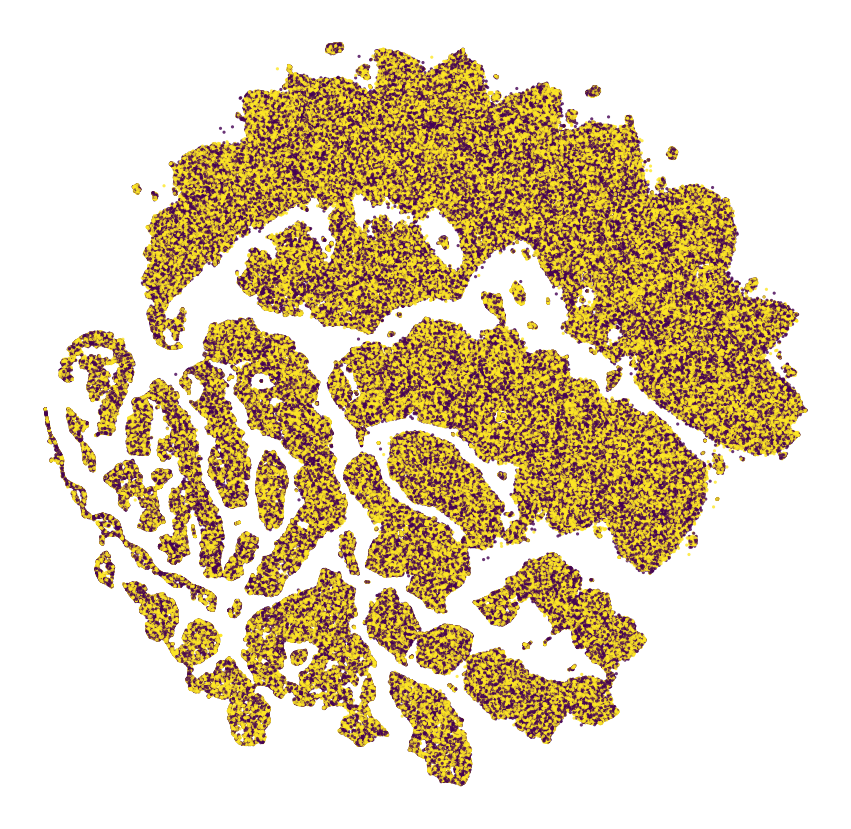

In [6]:
plt.figure(figsize=(15, 15))
plt.scatter(projection_2D[:,0], projection_2D[:,1],
            c=y.values, 
            edgecolor='none',
            alpha=0.80, 
            s=10)
plt.axis('off')
plt.show();

In [7]:
umap = UMAP(n_components=2, n_neighbors=50)
projection_2D = umap.fit_transform(X)

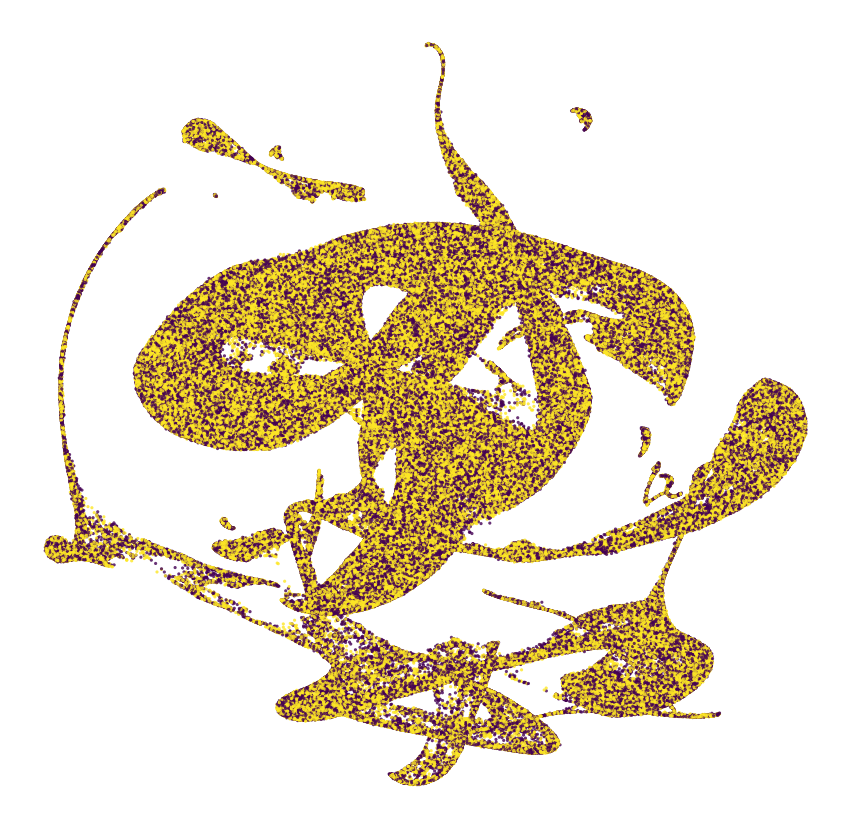

In [8]:
plt.figure(figsize=(15, 15))
plt.scatter(projection_2D[:, 0], projection_2D[:, 1],
            c=y, 
            edgecolor='none', 
            alpha=0.80, 
            s=10)
plt.axis('off')
plt.show();